## Оптимизация выполнения кода, векторизация, Numba

Материалы:
* Макрушин С.В. Лекция 3: Оптимизация выполнения кода, векторизация, Numba
* IPython Cookbook, Second Edition (2018), глава 4
* https://numba.pydata.org/numba-doc/latest/user/5minguide.html

## Задачи для совместного разбора

1. Сгенерируйте массив `A` из `N=1млн` случайных целых чисел на отрезке от 0 до 1000. Пусть `B[i] = A[i] + 100`. Посчитайте среднее значение массива `B`.

In [1]:
%load_ext line_profiler

In [2]:
import numpy as np
A = np.random.randint(0, 1000, size=(1_000_000, ))

def f1(A):
    acc, cnt = 0,0
    for ai in A:
        bi = ai + 100
        acc += bi
        cnt += 1
    return acc / cnt

In [3]:
%timeit f1(A)

527 ms ± 49.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
def f2(A):
    acc = 0
    for ai in A:
        acc += ai + 100
    return acc / len(A)

In [5]:
%timeit f2(A)

512 ms ± 51.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
def f3(A):
    return sum(A) / len(A) + 100

In [7]:
%timeit f3(A)

206 ms ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%lprun -f f1 f1(A)

In [9]:
import numba

In [10]:
@numba.njit
def f5(A):
    acc, cnt = 0,0
    for ai in A:
        bi = ai + 100
        acc += bi
        cnt += 1
    return acc / cnt

In [11]:
%timeit f5(A)

946 µs ± 41.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


2. Создайте таблицу 2млн строк и с 4 столбцами, заполненными случайными числами. Добавьте столбец `key`, которые содержит элементы из множества английских букв. Выберите из таблицы подмножество строк, для которых в столбце `key` указаны первые 5 английских букв.

In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.DataFrame(np.random.randint(0, 1000, size=(2_000_000, 4)),
                  columns=['col1', 'col2', 'col3', 'col4'])
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
df['key'] = np.random.choice(letters, 2_000_000, replace=True)

def g(df):
    letters = ['a', 'b', 'c', 'd', 'e']
    dfs = []
    for letter in letters:
        q = df[df['key']==letter]
        dfs.append(q)
    return pd.concat(dfs, axis=0)

In [14]:
g(df)

,col1,col2,col3,col4,key
1,606,202,8,761,a
6,959,732,673,813,a
18,601,994,826,227,a
24,991,48,238,667,a
38,947,944,166,888,a
...,...,...,...,...,...
1999992,554,119,958,618,e
1999994,982,657,705,230,e
1999995,251,896,903,477,e
1999996,548,935,341,720,e


In [15]:
%timeit g(df)

837 ms ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
df

,col1,col2,col3,col4,key
0,530,333,413,827,g
1,606,202,8,761,a
2,663,3,237,749,d
3,45,831,633,166,d
4,247,542,947,560,g
...,...,...,...,...,...
1999995,251,896,903,477,e
1999996,548,935,341,720,e
1999997,892,933,833,619,f
1999998,606,901,974,87,e


In [17]:
def g1(df):
    return df[df['key'].isin(['a', 'b', 'c', 'd', 'e'])]

In [18]:
g1(df)

,col1,col2,col3,col4,key
1,606,202,8,761,a
2,663,3,237,749,d
3,45,831,633,166,d
5,343,676,478,14,d
6,959,732,673,813,a
...,...,...,...,...,...
1999994,982,657,705,230,e
1999995,251,896,903,477,e
1999996,548,935,341,720,e
1999998,606,901,974,87,e


In [19]:
%timeit g1(df)

163 ms ± 58.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Лабораторная работа 3

1. В файлах `recipes_sample.csv` и `reviews_sample.csv` (__ЛР 2__) находится информация об рецептах блюд и отзывах на эти рецепты соответственно. Загрузите данные из файлов в виде `pd.DataFrame` с названиями `recipes` и `reviews`. Обратите внимание на корректное считывание столбца(ов) с индексами. Приведите столбцы к нужным типам.

Реализуйте несколько вариантов функции подсчета среднего значения столбца `rating` из таблицы `reviews` для отзывов, оставленных в 2010 году.

A. С использованием метода `DataFrame.iterrows` исходной таблицы;

Б. С использованием метода `DataFrame.iterrows` таблицы, в которой сохранены только отзывы за 2010 год;

В. С использованием метода `Series.mean`.

Проверьте, что результаты работы всех написанных функций корректны и совпадают. Измерьте выполнения всех написанных функций.


In [20]:
import pandas as pd

In [21]:
recipes = pd.read_csv('../sem02/data/recipes_sample.csv', sep=',')
reviews = pd.read_csv('../sem02/data/reviews_sample.csv', sep=',', index_col=0)
recipes.submitted = pd.to_datetime(recipes.submitted, format='%Y-%m-%d')
reviews.date = pd.to_datetime(reviews.date, format='%Y-%m-%d')

In [22]:
recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


In [23]:
reviews.head()

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


A. С использованием метода DataFrame.iterrows исходной таблицы;

In [24]:
def mean_1():
    summ = 0
    count = 0
    for i, el in reviews.iterrows():
        if el.date.year == 2010:
            summ += el.rating
            count += 1
    return summ / count

In [25]:
mean_1()

4.4544402182900615

Б. С использованием метода DataFrame.iterrows таблицы, в которой сохранены только отзывы за 2010 год;

In [26]:
def mean_2():
    summ = 0
    count = 0
    specific_reviews = reviews[reviews.date.dt.year == 2010]
    for i, el in specific_reviews.iterrows():
        summ += el.rating
        count += 1
    return summ / count

In [27]:
mean_2()

4.4544402182900615

In [28]:
def mean_2_1():
    summ = 0
    specific_reviews = reviews[reviews.date.dt.year == 2010]
    for i, el in specific_reviews.iterrows():
        summ += el.rating
    return summ / specific_reviews.shape[0]

In [29]:
mean_2_1()

4.4544402182900615

В. С использованием метода Series.mean.

In [30]:
def mean_3():
    return reviews[reviews.date.dt.year == 2010].rating.mean()

In [31]:
mean_3()

4.4544402182900615

2. Какая из созданных функций выполняется медленнее? Что наиболее сильно влияет на скорость выполнения? Для ответа использовать профайлер `line_profiler`. Сохраните результаты работы профайлера в отдельную текстовую ячейку и прокомментируйте результаты его работы.

(*). Сможете ли вы ускорить работу функции 1Б, отказавшись от использования метода `iterrows`, но не используя метод `mean`?

In [32]:
%timeit mean_1()

9.64 s ± 306 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%lprun -f mean_1 mean_1()

Timer unit: 1e-06 s

Total time: 30.953 s
File: <ipython-input-24-8be44cd1045e>
Function: mean_1 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def mean_1():
     2         1          2.0      2.0      0.0      summ = 0
     3         1          1.0      1.0      0.0      count = 0
     4    126697   26828085.0    211.7     86.7      for i, el in reviews.iterrows():
     5    126696    3817754.0     30.1     12.3          if el.date.year == 2010:
     6     12094     298691.0     24.7      1.0              summ += el.rating
     7     12094       8460.0      0.7      0.0              count += 1
     8         1          1.0      1.0      0.0      return summ / count

In [34]:
%timeit mean_2()

1.06 s ± 134 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%lprun -f mean_2 mean_2()

Timer unit: 1e-06 s

Total time: 2.4919 s
File: <ipython-input-26-7bfaa4593777>
Function: mean_2 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def mean_2():
     2         1          2.0      2.0      0.0      summ = 0
     3         1          1.0      1.0      0.0      count = 0
     4         1      12832.0  12832.0      0.5      specific_reviews = reviews[reviews.date.dt.year == 2010]
     5     12095    2167522.0    179.2     87.0      for i, el in specific_reviews.iterrows():
     6     12094     304012.0     25.1     12.2          summ += el.rating
     7     12094       7534.0      0.6      0.3          count += 1
     8         1          1.0      1.0      0.0      return summ / count

In [36]:
%timeit mean_2_1()

905 ms ± 181 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%lprun -f mean_2_1 mean_2_1()

Timer unit: 1e-06 s

Total time: 2.42014 s
File: <ipython-input-28-ea5aad8812b3>
Function: mean_2_1 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def mean_2_1():
     2         1          2.0      2.0      0.0      summ = 0
     3         1      12924.0  12924.0      0.5      specific_reviews = reviews[reviews.date.dt.year == 2010]
     4     12095    2109063.0    174.4     87.1      for i, el in specific_reviews.iterrows():
     5     12094     298142.0     24.7     12.3          summ += el.rating
     6         1          6.0      6.0      0.0      return summ / specific_reviews.shape[0]

In [38]:
%timeit mean_3()

10.2 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
%lprun -f mean_3 mean_3()

Timer unit: 1e-06 s

Total time: 0.014443 s
File: <ipython-input-30-41c8e8802d19>
Function: mean_3 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def mean_3():
     2         1      14443.0  14443.0    100.0      return reviews[reviews.date.dt.year == 2010].rating.mean()

Вывод
==================
Таким образом, самая медленная функция - mean_1()
Более всего занимает времени прохождение по циклу for
Суммирование каждого элемента к summ также занимает много времени (хоть и не так, как for)

Рациональнее (и быстрее) всего использовать встроенные функции (такие как mean(), например)

(*). Сможете ли вы ускорить работу функции 1Б, отказавшись от использования метода iterrows, но не используя метод mean?

In [40]:
def mean_2_2():
    specific_reviews = reviews[reviews.date.dt.year == 2010]
    return sum(specific_reviews.rating) / specific_reviews.shape[0]

In [41]:
mean_2_2()

4.4544402182900615

In [42]:
%timeit mean_2_2()

11.2 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
%lprun -f mean_2_2 mean_2_2()

Timer unit: 1e-06 s

Total time: 0.014559 s
File: <ipython-input-40-cb40c6b63216>
Function: mean_2_2 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def mean_2_2():
     2         1      13201.0  13201.0     90.7      specific_reviews = reviews[reviews.date.dt.year == 2010]
     3         1       1358.0   1358.0      9.3      return sum(specific_reviews.rating) / specific_reviews.shape[0]

(данная функция ускорилась c s до ms)

3. Вам предлагается воспользоваться функцией, которая собирает статистику о том, сколько отзывов содержат то или иное слово. Измерьте время выполнения этой функции. Сможете ли вы найти узкие места в коде, используя профайлер? Выпишите (словами), что в имеющемся коде реализовано неоптимально. Оптимизируйте функцию и добейтесь значительного (как минимум, на один порядок) прироста в скорости выполнения.

In [44]:
def get_word_reviews_count(df):
    word_reviews = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        recipe_id, review = row['recipe_id'], row['review']
        words = review.split(' ')
        for word in words:
            if word not in word_reviews:
                word_reviews[word] = []
            word_reviews[word].append(recipe_id)
    
    word_reviews_count = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        review = row['review']
        words = review.split(' ')
        for word in words:
            word_reviews_count[word] = len(word_reviews[word])
    return word_reviews_count

In [45]:
get_word_reviews_count(reviews)

{'Last': 94,
 'week': 804,
 'whole': 5628,
 'sides': 312,
 'of': 109029,
 'frozen': 2647,
 'salmon': 729,
 'fillet': 60,
 'was': 88781,
 'on': 34583,
 'sale': 149,
 'in': 61539,
 'my': 44144,
 'local': 561,
 'supermarket,': 10,
 'so': 46090,
 'I': 285147,
 'bought': 1369,
 'tons': 161,
 '(okay,': 5,
 'only': 13965,
 '3,': 48,
 'but': 42513,
 'total': 381,
 'weight': 160,
 'over': 9065,
 '10': 2303,
 'pounds).': 2,
 '': 214145,
 'This': 39448,
 'recipe': 41098,
 'is': 55075,
 'perfect': 4398,
 'for': 121224,
 'fillet,': 14,
 'even': 7878,
 'though': 2314,
 'it': 111175,
 'calls': 520,
 'steaks.': 93,
 'cut': 6688,
 'up': 13585,
 'the': 266050,
 'into': 7031,
 'individual': 314,
 'portions': 156,
 'and': 217849,
 'followed': 4859,
 'instructions': 731,
 'exactly.': 571,
 "I'm": 7145,
 'one': 15086,
 'those': 2287,
 'food': 2413,
 'combining': 74,
 'diets,': 5,
 'left': 4690,
 'out': 23644,
 'white': 3425,
 'wine': 1256,
 'added': 21710,
 'just': 24944,
 'a': 166136,
 'dash': 532,
 'vineg

In [46]:
%timeit get_word_reviews_count(reviews)

28 s ± 1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%lprun -f  get_word_reviews_count  get_word_reviews_count(reviews)

Timer unit: 1e-06 s

Total time: 86.7484 s
File: <ipython-input-44-b1bc049bcd0c>
Function: get_word_reviews_count at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def get_word_reviews_count(df):
     2         1          3.0      3.0      0.0      word_reviews = {}
     3    126680   27781146.0    219.3     32.0      for _, row in df.dropna(subset=['review']).iterrows():
     4    126679    3933444.0     31.1      4.5          recipe_id, review = row['recipe_id'], row['review']
     5    126679     859976.0      6.8      1.0          words = review.split(' ')
     6   6918689    3177396.0      0.5      3.7          for word in words:
     7   6792010    4516411.0      0.7      5.2              if word not in word_reviews:
     8    174944     138838.0      0.8      0.2                  word_reviews[word] = []
     9   6792010    4755365.0      0.7      5.5              word_reviews[word].append(recipe_id)
    10                                               
    11         1          2.0      2.0      0.0      word_reviews_count = {}
    12    126680   27827496.0    219.7     32.1      for _, row in df.dropna(subset=['review']).iterrows():
    13    126679    2467989.0     19.5      2.8          review = row['review']
    14    126679     882264.0      7.0      1.0          words = review.split(' ')
    15   6918689    3242808.0      0.5      3.7          for word in words:
    16   6792010    7165244.0      1.1      8.3              word_reviews_count[word] = len(word_reviews[word])
    17         1          2.0      2.0      0.0      return word_reviews_count

Комментарий
============

Данная функция дважды итерирует принимаемый dataframe - действие излишнее, к тому же цикл for занимает много времени. В итерации многие действия выполняются дважды (split, присваивание row['review']). Необходимость в объявлении двух словарей отсутсвует (можно сразу создать один, добавить в него ключи и изменять значения). Для посчета количества элементов ("отзывы, в которых встречаются слова") используется сначала list, а затем подсчитывается количество элементов. Этого можно избежать, и сразу записывает "счетчик". 

Все эти нерациональные действия вызывают чересчур долгое исполнение функции.
По-хорошему, лучше вовсе избавиться от iterrows

In [48]:
def get_word_reviews_count_2(df):
    word_reviews = {}
    df_nona = df.dropna(subset=['review'])['review']
    for row in df_nona:
        for word in row.split():
            if word not in word_reviews:
                word_reviews[word] = 1
            else:
                word_reviews[word] += 1
    return word_reviews

In [49]:
get_word_reviews_count_2(reviews)

{'Last': 100,
 'week': 804,
 'whole': 5630,
 'sides': 313,
 'of': 109040,
 'frozen': 2648,
 'salmon': 729,
 'fillet': 60,
 'was': 88793,
 'on': 34590,
 'sale': 149,
 'in': 61551,
 'my': 44166,
 'local': 561,
 'supermarket,': 10,
 'so': 46106,
 'I': 288141,
 'bought': 1369,
 'tons': 161,
 '(okay,': 5,
 'only': 13967,
 '3,': 48,
 'but': 42528,
 'total': 381,
 'weight': 160,
 'over': 9066,
 '10': 2305,
 'pounds).': 3,
 'This': 39937,
 'recipe': 41128,
 'is': 55083,
 'perfect': 4400,
 'for': 121248,
 'fillet,': 14,
 'even': 7881,
 'though': 2315,
 'it': 111224,
 'calls': 520,
 'steaks.': 96,
 'cut': 6689,
 'up': 13585,
 'the': 266099,
 'into': 7035,
 'individual': 314,
 'portions': 156,
 'and': 217925,
 'followed': 4861,
 'instructions': 731,
 'exactly.': 578,
 "I'm": 7227,
 'one': 15090,
 'those': 2287,
 'food': 2416,
 'combining': 74,
 'diets,': 5,
 'left': 4691,
 'out': 23647,
 'white': 3426,
 'wine': 1258,
 'added': 21723,
 'just': 24955,
 'a': 166160,
 'dash': 532,
 'vinegar': 1273,
 

In [50]:
%timeit get_word_reviews_count_2(reviews)

1.76 s ± 52.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
%lprun -f  get_word_reviews_count_2  get_word_reviews_count_2(reviews)

Timer unit: 1e-06 s

Total time: 9.64389 s
File: <ipython-input-48-e16bb7d32bf4>
Function: get_word_reviews_count_2 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def get_word_reviews_count_2(df):
     2         1          2.0      2.0      0.0      word_reviews = {}
     3         1      49409.0  49409.0      0.5      df_nona = df.dropna(subset=['review'])['review']
     4    126680      70503.0      0.6      0.7      for row in df_nona:
     5   6716549    2882105.0      0.4     29.9          for word in row.split():
     6   6589870    3149378.0      0.5     32.7              if word not in word_reviews:
     7    164271      77073.0      0.5      0.8                  word_reviews[word] = 1
     8                                                       else:
     9   6425599    3415420.0      0.5     35.4                  word_reviews[word] += 1
    10         1          0.0      0.0      0.0      return word_reviews

4. Напишите несколько версий функции `MAPE` (см. [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)) для расчета среднего абсолютного процентного отклонения значения рейтинга отзыва на рецепт от среднего значения рейтинга по всем отзывам для этого рецепта. 
    1. Без использования векторизованных операций и методов массивов `numpy` и без использования `numba`
    2. Без использования векторизованных операций и методов массивов `numpy`, но с использованием `numba`
    3. С использованием векторизованных операций и методов массивов `numpy`, но без использования `numba`
    4. C использованием векторизованных операций и методов массивов `numpy` и `numba`
    
Измерьте время выполнения каждой из реализаций.

Замечание: удалите из выборки отзывы с нулевым рейтингом.


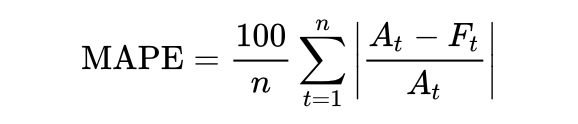

In [52]:
from IPython.display import Image
Image("1.png")

In [53]:
A = reviews[reviews['rating']>0].groupby(by='recipe_id').mean().reset_index() 
A['F'] = A['recipe_id'].map(reviews[reviews['rating']>0].groupby(by='recipe_id')['rating'].agg(list))
res = A.drop(['user_id'], axis = 1)
res

,recipe_id,rating,F
0,48,2.000000,[2]
1,55,4.750000,"[5, 5, 4, 5]"
2,66,4.944444,"[5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
3,91,4.750000,"[5, 5, 4, 5]"
4,94,5.000000,"[5, 5, 5, 5]"
...,...,...,...
27435,536360,5.000000,[5]
27436,536473,5.000000,[5]
27437,536547,5.000000,[5]
27438,536728,4.000000,[4]


Без использования векторизованных операций и методов массивов numpy и без использования numba

In [54]:
def mape_1(A, F):
    result = []
    for (at, ft) in zip(A, F):
        summ = 0
        for i in ft:
            summ += abs( at - i ) / at
        summ = summ * 100 / len(ft)
        result.append(summ)
    return result

In [55]:
mape_1(res['rating'], res['F'])[:5]

[0.0, 7.894736842105263, 2.122347066167288, 7.894736842105263, 0.0]

In [56]:
%timeit mape_1(res['rating'], res['F'])

26 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Без использования векторизованных операций и методов массивов numpy, но с использованием numba

In [57]:
import numba

In [58]:
@numba.njit
def mape_2(A, F):
    result = List()
    for (at, ft) in zip(A, F):
        summ = 0
        for i in ft:
            summ += abs( at - i ) / at
        summ = summ * 100 / len(ft)
        result.append(summ)
    return result

In [59]:
from numba.typed import List
A_numba, F_numba = List(), List()
[A_numba.append(x) for x in res['rating']]
[F_numba.append(List(i for i in x)) for x in res['F']]

print(mape_2(A_numba, F_numba)[:5])

[0.0, 7.894736842105263, 2.122347066167288, 7.894736842105263, 0.0]


In [60]:
%timeit mape_2(A_numba, F_numba)

2.73 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


С использованием векторизованных операций и методов массивов numpy, но без использования numba

In [62]:
def mape_func(a, b):
    res = [np.fabs((a - el) / a) * 100 for el in b]
    return np.mean(res)

def mape_3(A, F): 
    vfunc = np.vectorize(mape_func)
    return vfunc(A, F)

In [63]:
A_numpy = np.array(res['rating'])
F_numpy = np.array(res['F'])

mape_3(A_numpy, F_numpy)[:5]

array([0.        , 7.89473684, 2.12234707, 7.89473684, 0.        ])

In [64]:
%timeit mape_3(A_numpy, F_numpy)

545 ms ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C использованием векторизованных операций и методов массивов numpy и numba

In [65]:
from numba.typed import List

In [66]:
@numba.njit
def mape_func_4(a, b):
    summ = 0
    for el in b:
        summ += abs( a - el ) / a
    return summ * 100 / len(b)

def mape_4(A, F): 
    vfunc = np.vectorize(mape_func_4)
    return vfunc(A, F)

In [67]:
A_numba, F_numba = List(), List()
[A_numba.append(x) for x in res['rating']]
[F_numba.append(List(i for i in x)) for x in res['F']]

print(mape_4(A_numba, F_numba)[:5])

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[0.         7.89473684 2.12234707 7.89473684 0.        ]


In [68]:
%timeit mape_4(A_numba, F_numba)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2.02 s ± 88.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
